In [1]:
!pip install folium
import folium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('Police_Department_Incidents.csv')
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [3]:
df1=df.groupby('PdDistrict').count()
df1.drop(['Category','Descript','DayOfWeek','Date','Time','Resolution','Address','X','Y','Location','PdId'],axis=1,inplace=True)
df1=df1.reset_index()
df1.columns=['Neighbourhood','Count']
df1.sort_values(by='Count',ascending=False,inplace=True)
df1=df1.reset_index()
df1.drop(['index'],inplace=True,axis=1)
df1

,Neighbourhood,Count
0,SOUTHERN,28445
1,NORTHERN,20100
2,MISSION,19503
3,CENTRAL,17666
4,BAYVIEW,14303
5,INGLESIDE,11594
6,TARAVAL,11325
7,TENDERLOIN,9942
8,RICHMOND,8922
9,PARK,8699


In [4]:
san_fran_geo=r'san-francisco.geojson'
san_fran_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

In [5]:
san_fran_map.choropleth(
    geo_data=san_fran_geo,
    data=df1,
    columns=['Neighbourhood','Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity = 0.7,
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)
san_fran_map

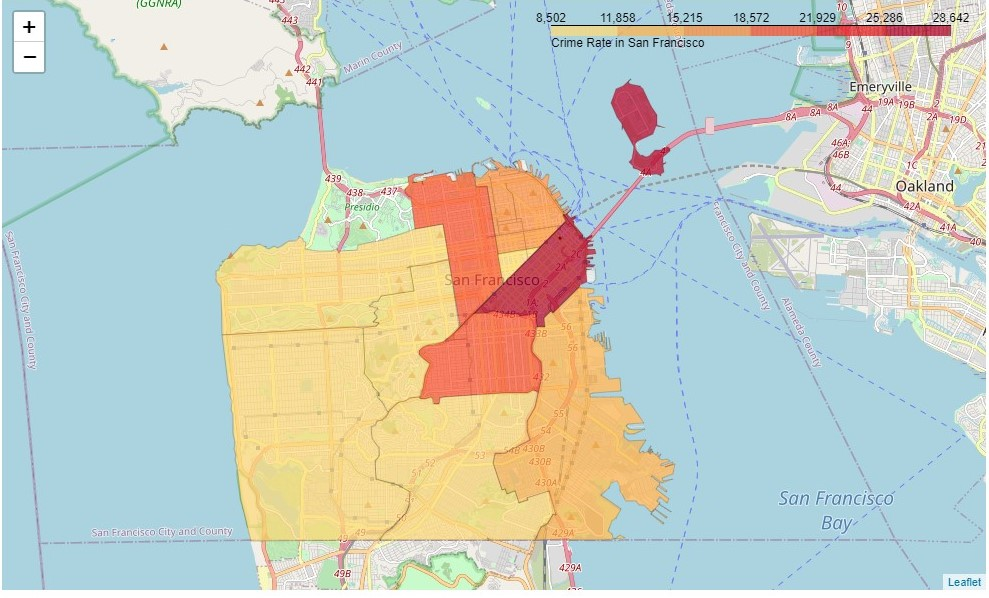

In [11]:
from IPython.display import Image
Image("4.jpg",width=4000,height=2000)